<a href="https://colab.research.google.com/github/heitor-eng/H_Data_Science/blob/master/ML_Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9ditos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Detecção de fraudes em cartões de créditos

 Este projeto é inspirado no desafio [*Credit Card Fraud*](https://www.kaggle.com/mlg-ulb/creditcardfraud) do Kaggle, em que temos disponibilizado um conjunto de dados (*dataset*) prévio de uma instituição financeira internacional e através dele construir análises com as ferramentas de *Data Science* para a verificação das ações fraudulentas em cartões de crédito.
 
 Esse é um problema comum e recorrente que as instituições financeiras enfrentam, como os bancos e as *fintechs*, e para manter o máximo de segurança nas transações financeiras de seus clientes é importante para a instituição trabalhar com as melhores tecnologias na detecção de operações fraudulentas e assim evitar os constrangimentos e prejuizos gerados para o cliente e o banco.
 
<p align=center>
<img src = "https://github.com/heitor-eng/H_Data_Science/blob/master/Imagens/cards-3252979_1280%20(1).png?raw=true" width = "50%">
</p>

E para combater esse tipo de golpe, as instituições financeiras fazem uso de tecnologias cada vez mais avançada na detecção e prevenção de casos fraudulentos, como por exemplo o uso de algoritmos de *machine learning*, em que essas ferramentas através do uso dos dados de consumo do cliente com o cartão, vai identificar e notificar o usuário sobre qualquer movimetanção feita em sua conta que pareça estranha, podendo assim impedir o golpe.

Porém devido à toda essa segurança, às vezes, o nosso cartão pode ser bloqueado porquê o algoritmo entendeu errado a compra e assim travando o cartão ou a compra e isso gera um constrangimento e trabalho para arrumar isso por parte do cliente. 

Para essas duas situações o que temos é uma situação "problema de cenário" em que o índivíduo faz uma compra que não muito comum para o seu padrão e assim é classificada como uma possível fraude, ou seja, um falso positivo e nesse projeto um  dos focos do trabalho será verificar a quão bom é ou  qual é o melhor modelo de *machine learning* para essa situação.
 

## Importando os dados

 Os dados que são utilizados neste trabalho foram disponibilizados por algumas empresas europeias de cartão de crédito. O conjunto de dados (*dataset*) trás informações de que as movimentações financeiras ocorreram num período de dois dias, em que foram classificados 492 casos de fraudes para mais de 280 mil transações.

 Como é possível notar, o *dataset* está extremamente desbalanceado, porquê as fraudes representam apenas 0,17% do total.

 Outra informação interessante de se destacar é que as *features* são todas numéricas, e foram descarterizadas (por motivos de privacidade e segurança dos clientes). Com isso temos colunas $[V1, V2, V3,...,Vn]$. 



<p align=center>
<img src="https://github.com/heitor-eng/H_Data_Science/blob/master/Imagens/pexels-pixabay-259200.jpg?raw=true" width="50%"></p>

 
 E por último, é informado na própria página do [*desafio*](https://www.kaggle.com/mlg-ulb/creditcardfraud), que as variáveis passaram pela transformação **PCA**. 

  **PCA - Principal Component Analysis** ou em português Análise de Componentes Principais, nada mais é do que uma redução da dimensão da matriz, do cojunto de dados, enquanto mantém o maior número de informações possíveis.Para conseguir isso, o algorítimo encontra um conjuno novo de recursos que são os **componentes**. Esses componentes são em número menor ou igual as variáveis originais, e que neste caso são as próprias colunas $[V1,V2,V3...,Vn]$.

In [1]:
# suprimir os warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# instalar a biblioteca scikit-plot
!pip install -q scikit-plot

In [2]:
# bibliotecas importadas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

from imblearn.under_sampling import RandomUnderSampler

# configurar o estilo dos gráficos com Aeaborn
sns.set_style("dark")


In [4]:
file_path = "/content/drive/MyDrive/Colab Notebooks/Scikit-learn/creditcard.csv"
df = pd.read_csv(file_path)

Com as bibliotecas declaradas e o arquivo importado dentro de uma estrutura de *DataFrame* - não há necessidade de mais nenhum ajuste nessa etapa, podendo assim prosseguir para a análise exploratória dos dados e assim para a criação do modelo de *machine learning*.

## Análise Exploratória dos dados

Ao analisar as cinco primeiras entradas do *dataset* consigo ter algumas conclusões: 
 
* Como que a transformação PCA deixou as *features* descaterizadas, que são as colunas $Vn$, e em valores númericos.
* As colunas *Time* e *Amount* foram preservadas, mantendo o valor original.
* A coluna *Class* é a coluna que tem a variável alvo, em que:

    > 0 : Regular

    > 1 : Fraude


In [5]:
# Verificar as 5 primeiras entradas do DataFrame
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# Identificando a quantidade de entradas e variáveis
print("Entradas:\t{}".format(df.shape[0]))
print("Variáveis:\t{}\n".format(df.shape[1]))


Entradas:	284807
Variáveis:	31



### Resumo Estatístico do *dataset*
Pelo método `describe()` consegue-se reparar em dois detalhes interessantes:
* Que a média dos valores na coluna *Class* é 0.0017 arredondando, ou seja, temos muito mais valores indicando operações regulares [0] do que fraudulentas[1]; 
* A média da coluna *Amount* não é muito alta, *amount* significa valores em português, então temos que a média dos valores transacionados são  entorno de US $ 88.35, mediana igual a 22.00 e desvio padrão de 250.12. Quando repara no valor máximo transacionado percebe-se que pode ter sido uma situação de fraude ou é apenas um *outlier*, porquê a maioria das transações financeiras são de valores bem menores.

In [7]:
# o resumo estatístico sobre os dados do DataFrame
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Quanto à qualidade do *dataset*, este não apresentou nenhum valor ausente ou que demandasse uma etapa de limpeza e/ou correções. A função abaixo prova que o maior valor por coluna para valores nulos é zero, ou seja, confirma que não há valores ausentes 

In [8]:
# Verificar se existe números nulos, ausentes, no dataset
df.isnull().sum().max() 

0

### Entendendo a coluna *Class*
O gráfico de barras abaixo, mostra como está desbalanceado a colunas *class* e isso na prática interfere no entendimento e desempenho do modelo de *machine learning*, para evitar isso é necessário fazer um balanceamento dos dados antes de alimentar o modelo final de classificação.  


A quantidade de casos Regulares no dataset são de 99.83%. 	
Enquato para os casos de Fraudes são somente de 0.173%.



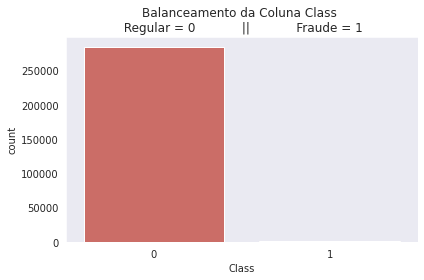

In [9]:
# Distorção da coluna "Class" 
print("A quantidade de casos Regulares no dataset são de {:.4}%. \t".format(df['Class'].value_counts()[0]/len(df)*100))
print("Enquato para os casos de Fraudes são somente de {:.3}%.\n".format(df['Class'].value_counts()[1]/len(df)*100))

# Distribuição dos dados na coluna Class através do método countplot()
color = sns.color_palette("hls")
 #palette = color
ax = sns.countplot(x="Class", data=df, palette = color)

plt.title('Balanceamento da Coluna Class \n Regular = 0            ||            Fraude = 1')
plt.tight_layout()

Para as variáveis *Time* e *Amount* é plotado os histogramas de suas distribuições para os casos regulares e de fraudes do *dataset*. Com isso no final o que consegue-se é apenas mostrar que há o desequilibrio elevado dos dados no *dataset*.

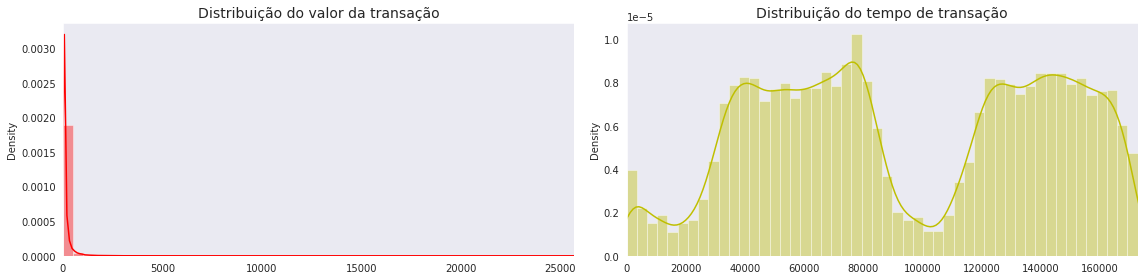

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(16,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribuição do valor da transação', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='y')
ax[1].set_title('Distribuição do tempo de transação', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.tight_layout()

Continuando o trabalho de análise exploratória, plotou-se os boxplots para ver se há alguma diferença no padrão transações em relação à dimensão *Amount*.

De uma maneira geral, percebe-se uma distribuição diferente para as duas classes, o que provavelmente irá contribuir para o treinamento do modelo de *machine learning*.



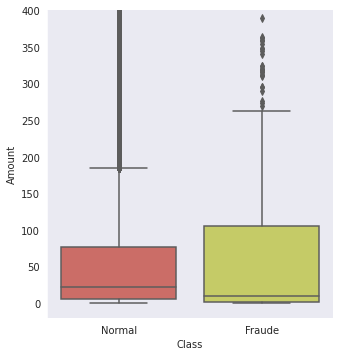

In [11]:
# Boxplot da coluna AMOUNT
 
sns.catplot(x ="Class" , y ="Amount", data = df, kind = "box", palette = color)
plt.ylim(-20,400)
plt.xticks([0,1],["Normal", "Fraude"])
 
plt.show()

As informações estatísticas para `df.Class == 1` mostram que a sua média exata está em 118.13 e a mediana em 9.21.

In [12]:
df[(df.Class==1) & (df.Amount < 2000)]['Amount'].describe()

count     491.000000
mean      118.130550
std       240.439028
min         0.000000
25%         1.000000
50%         9.210000
75%       105.350000
max      1809.680000
Name: Amount, dtype: float64

**Matriz correlação**

Abaixo foi feito uma correlação do conjunto de dados, e esse é um passo interessante para verificar se há correlação entre as colunas, se sim posso verificar qual é a relação com algum caso de fraude ou regular.

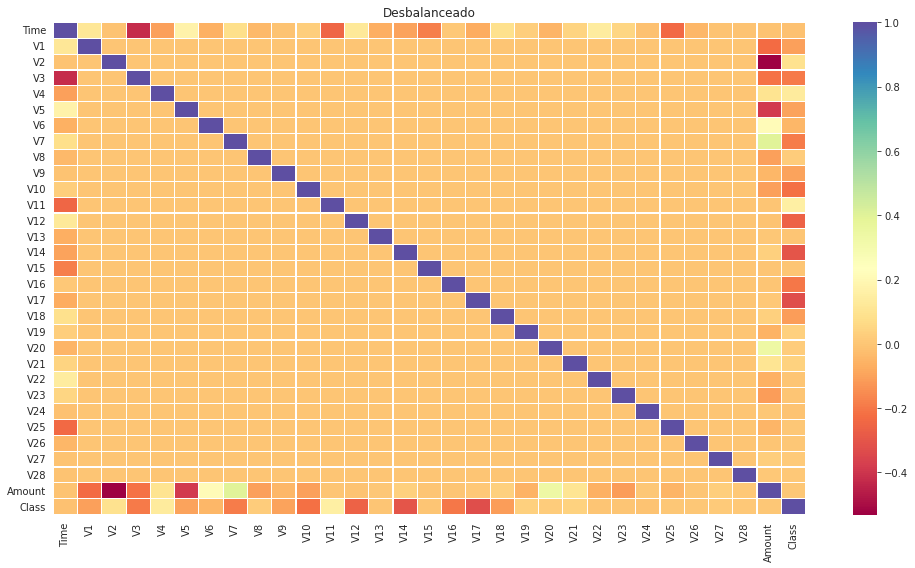

In [13]:
# matriz correlação dos dados
corr = df.corr()

#heatmap
fig, ax = plt.subplots(nrows=1, ncols =1, figsize=(14,8))
sns.heatmap(corr,xticklabels = corr.columns, yticklabels = corr.columns, linewidths=.1, cmap ="Spectral", ax = ax)
ax.set_title("Desbalanceado")
plt.tight_layout()

Aparentemente como é mostrado no *heatmap* do jeito que está o conjunto de dados não temos correlação nenhuma entre essas três variáveis, ou seja, elas não se conversam... o que pode ser devido ao desbalanceamento do `dataset` ou como as variáveis estão com o PCA aplicado, talvez isso tenha influenciado na correlação e isso será verificado mais para frente.


**Comparando as variáveis $Vn$**

Continuando o EDA, e em busca de enteder os dados que sofreram o PCA, uso o gráfico de densidade para comparar as distribuições de cada variável para cada classe e ver quais as mais importantes para detecção de anomalias.

O que se procura nesse tipo de visualização são distribuições que diferem uma da outra, permitindo identificar fraudes mais facilmente. Veja como exemplo as variáveis `V3`, `V4`, `V10` e `V11`, como elas são bem distintas.

Por outro lado, variáveis como `V8`, `V13` e `V15` são muito similares, apresentando aproximadamente o mesmo comportamento.

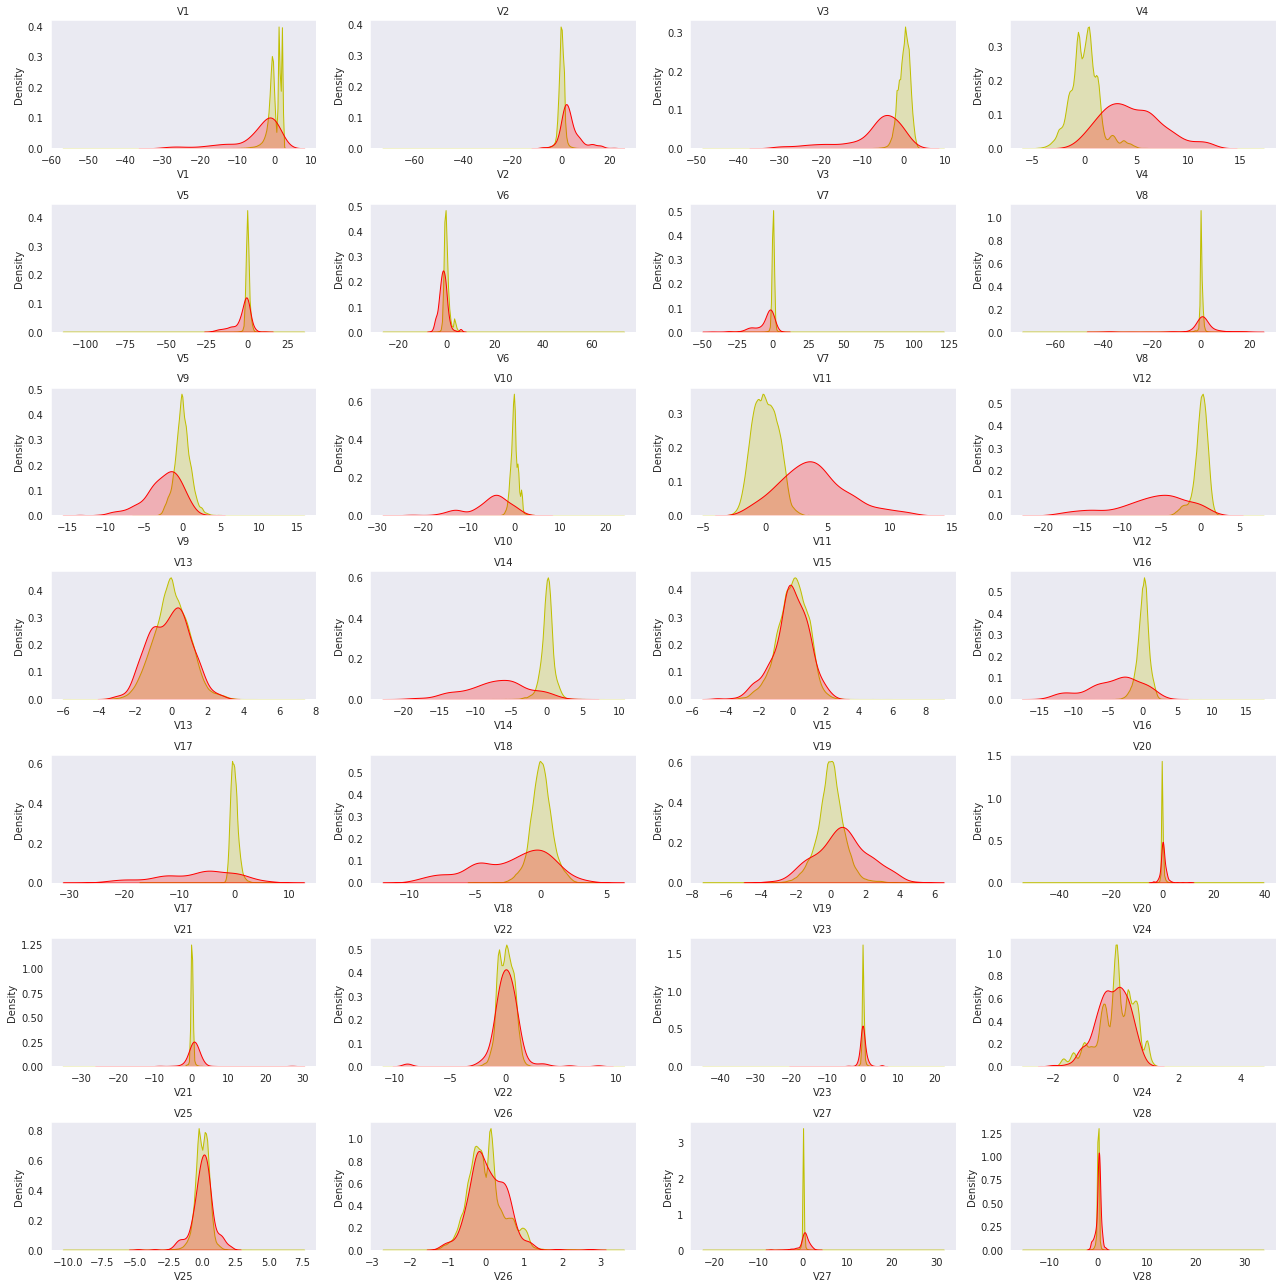

In [14]:
# Comparação entre os valores que sofreram PCA
colunas = df.drop(['Class', 'Amount', 'Time'], axis=1).columns
num_plots = len(colunas)
df_regular = df[df.Class == 0]
df_fraude = df[df.Class == 1]

fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18,18))
fig.subplots_adjust(hspace=1, wspace=1)

conta = 0
for col in colunas:
    conta += 1
    plt.subplot(7, 4, conta)
    sns.kdeplot(df_regular[col], label="Class 0", shade=True, color = "y")
    sns.kdeplot(df_fraude[col], label="Class 1", shade=True, color = "r")
    plt.title(col, fontsize=10)
plt.tight_layout()

### **Principais pontos obtidos do EDA**

* O *dataset* está muito desbalanceado, porquê as transações fraudulentas representam somente 0,17% das entradas totais.
* Não existem valores ausentes ou nulos no *dataframe*.
* Houve o PCA para todas as variáveis, exceto para as variáveis `Time` e `Amount`.
* As colunas `Time` e `Amount` precisam ser normalizadas.


## Preparação dos dados

Para que os dados possam alimentar os modelos de aprendizado de máquina (*machine learning*) que vou construir, é necessário executar os seguintes passos:

* Padronizar as *features* `Time` e `Amount`, que estão em outra ordem de grandeza.
* Dividir entre dados de treino e teste
* Balancear os dados a fim de evitar uma baixa performance para a classe 1 e *overfitting*.

**Padronizar as variavéis `Time` e `Amount`**
 
Nesta etapa as colunas `Time`e `Amount` vão ser padronizadas por meio da classe `RboustScaler`, porque ela é menos sensível aos *outliers*. E serão dispostas logo no início do *DataFrame*.

In [15]:
# Normalização das variáveis Time e Amount

# A RoboustScaler é menos sensível aos outliers
df_clean = df.copy()

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df_clean['norm_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df_clean['norm_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

# reomvendo as colunas Amount e Time originais do df
df_clean.drop(['Amount','Time'], axis = 1, inplace = True)


In [16]:
# Declarar as colunas normalizadas
norm_amount = df_clean['norm_amount']
norm_time = df_clean['norm_time']

# Redirecionando e aplicando as colunas Time e Amount normalizadas
df_clean.drop(['norm_amount','norm_time'], axis = 1, inplace = True)
df_clean.insert(0, 'norm_amount', norm_amount)
df_clean.insert(1,"norm_time", norm_time)

df_clean.head()

,norm_amount,norm_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


**Dividir o conjunto de dados** 

Antes de dar continuidade ao trabalho de balanceamento dos dados, primeiro tenho que dividir ("*splitar*") o *dataset* original entre conjunto de treino e teste. Caso contrário, não terei parâmetros para conferir se o balanceamento foi adequado, ou seja, esse procedimento permite que os dados separados sirvam de referência para futuras análises.

E para assegurar de que os conjuntos de teste e treino tenham as mesmas quantidade de classes proporcionalmente, passo os comandos e `shuffle = True`.

In [17]:
# separar as variáveis entre X e y
X = df_clean.drop("Class", axis = 1)
y = df_clean["Class"]

# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, shuffle = True)

**Balancear o conjunto de dados**

Há algumas maneiras de fazer o balanceamento do *dataset*, desde de uma cadeia de comandos em que se seleciona uma porção do *dataset* para ser utilizado, como por exemplo uma amostra do *dataset* e que de forma aleatória a divide em propoções iguais entre situações regulares = 0 e fraudulentas = 1 ou através a abordagem *sampling*.

**Sampling** é um pré-processamento que visa minimizar as discrepâncias entre as classes por meio de uma reamostragem. Para gerar um conjunto balanceado, são usadas normalmente as seguintes técnicas:

* **Over-sampling**: cria novas observações da classe minoritária a partir das informações contidas nos dados originais. Essa geração de novas entradas pode ser feita aleatoriamente com o auxílio de técnicas de _clustering_ ou sinteticamente.

* **Under-sampling**: extrair um subconjunto aleatório da classe majoritária, preservando as características da classe minoritária, sendo ideal para situações de grandes volumes de dados. Apesar de reduzir o tempo computacional e de armazenamento, esta técnica descarta informações da classe majoritária, o que pode levar a uma performance inferior nas predições dela.

E neste projeto é utilizado a biblioteca `imblearn` que já permite de forma fácil aplicar essas técnicas no *dataset* e assim balancear os dados. Para esse trabalho foi utilizadoa técnica [*Random Under-sampling*](https://imbalanced-learn.org/stable/under_sampling.html), por justamente preservar a classe minoritária quando faz o balanceamento.

Comparando o gráfico de barra do ínicio, com este daqui, fica nítido que agora temos o balanceamento dos dados (gráfico de barras no início deste *notebook*). 


1    369
0    369
Name: Class, dtype: int64


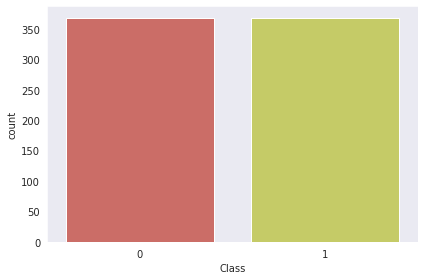

In [20]:
# Aplicar método RandomUnderSample
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train,y_train)

# ver o balanceamento das classes
print(pd.Series(y_rus).value_counts())

# plotar a nova distribuição de classes
color = sns.color_palette("hls")
sns.countplot(y_rus, palette = color)
plt.tight_layout()

Com o *dataset* equilibrado, posso gerar uma nova matriz de correlação e identificar quais variáveis estão mais fortemente relacionadas.

Antes sem o balanceamento de dados, a matriz de correlação não trazia nenhuma informação relevante. Entretanto, ela traz muito mais informações após um correto balanceamento. 

E como é mostrado na figura abaixo em que antes não havia um grau de correlação significativa, agora com o balanceamento é possível para o modelo de *machine learning* entender quais variáveis se conversam e com isso identificar com uma precisão melhor os padrões de compras são regulares ou não, quando for aplicado o algoritmo de *ML*. 

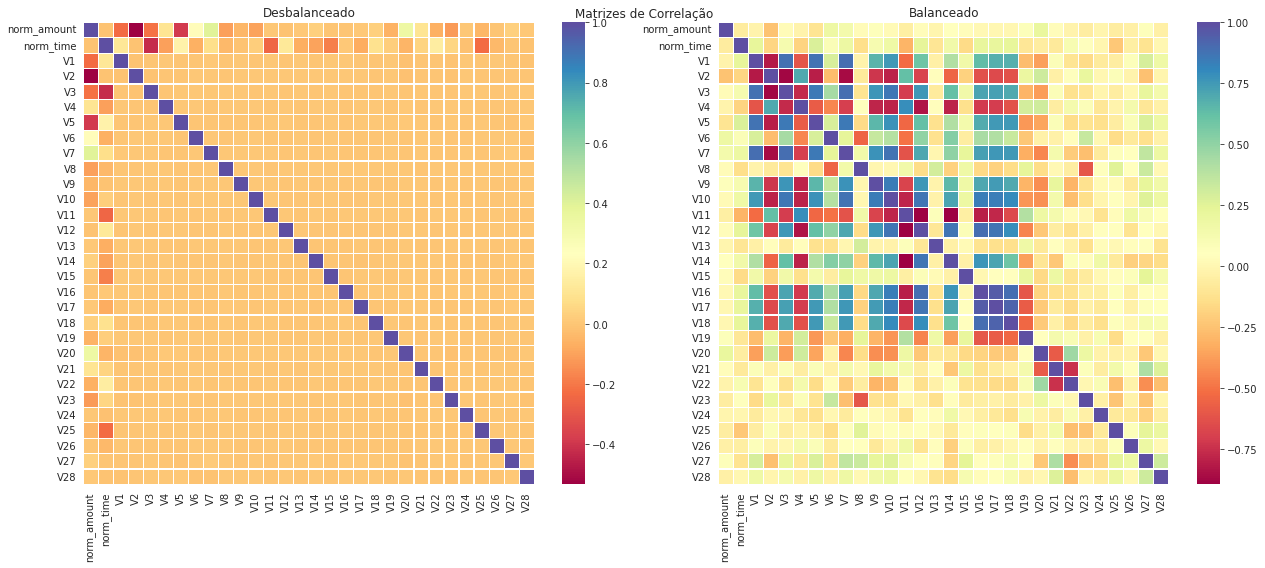

In [21]:
# plotar heatmaps das correlações e comparaçoões
corre = X_train.corr()
corr_rus = pd.DataFrame(X_rus).corr()

# criando o plot
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize =(18,8))
fig.suptitle("Matrizes de Correlação") 

# caso desbalanceada
sns.heatmap(corre,xticklabels = corre.columns, yticklabels = corre.columns, linewidths=.1, cmap ="Spectral", ax = ax[0])
ax[0].set_title("Desbalanceado")

# agora balanceado
sns.heatmap(corr_rus, xticklabels = corr_rus.columns, yticklabels = corr_rus.columns, linewidths =.1, cmap ="Spectral",  ax = ax[1])
ax[1].set_title("Balanceado")

plt.tight_layout()

##Modelos de Machine Learning 

Com os dados tratados e corretamente balanceados agora consigo aplicar os algoritmos de *Machine Learning* e para esse caso por se tratar de um problema de detecção da probabilidade de um evento acontecer, como por exemplo o caso da previsão do tempo se amanhã vai chover ou não, ou se um e-mail é spam ou não e eventos similares, é caracterizado como modelos de **classificação**.

Aqui neste projeto aplico dois algoritmos de **classificação de machine learning**, no primeiro modelo uso regressão logística e faço a sua análise de desempenho, e por último o algoritmo de *machine learning* de árvore de decisão em que também avalio o desempenho do modelo.

###Regressão Logística

O *script* abaixo demonstra o passo a passo que foi feito para aplicar corretamento o modelo de ML de **regressão logistica**.

In [22]:
# Modelo de machine learning : Regressão Logistica

# 1. escolher e importar o modelo
from sklearn.linear_model import LogisticRegression

np.random.seed(2)
# 2. selecionar o modelo
model = LogisticRegression()

# 3. fit do modelo (treinar)
model.fit(X_rus, y_rus)

# 4. Previsão em cima dos novos casos
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)


### Avaliando o desempenho do modelo

Por se tratar de um modelo de **CLASSIFICAÇÃO** as métricas que são utilizadas, estão disponíveis no relatório de classificação abaixo e podem ser acessadas pelo método `classification_report()`.

Do relatório de classificação, quero destacar as medidas que para **a detecção dos casos de fraudes** que são mais interessantes, como por exemplo: 

* *Recall* : Mostra a proporção de positivos encontrados corretamente,
* Acurácia : A acurácia mostra diretamente a porcentagem de acertos do modelo de regressão,
* Matriz Confusão: Para cada classe, ela informa quais os valores reais (*true*) e os valores previstos pelo modelo (*predicted*), como por exemplo na matriz abaixo, no eixo das ordenadas temos o valor real e no eixo das abscissas o valor previsto pelo modelo, e que a matriz pode ser lida da seguinte maneira:
    * 0 x 0 : Porcentagem da previsão de casos em que as situações são regulares e o modelo identficou como regulares;
    * 0 x 1: Porcentagem dos casos em que não era fraude mas o modelo declarou fraude;
    * 1 x 0: Porcentagem dos casos em que eram fraudes mas o modelo identficicou como regular;
    * 1 x 1: Porcentagem dos casos em que eram fraudes e o modelo os identificou como fraude.

* Área sobre a curva ROC (AUC): É um resumo do quão habilidoso está sendo a previsão do algoritmo de *machine learning*.
O valor AUC nos diz se a previsão está 100% errada para casos em que é AUC = 0 ou 100% correto para previsões em que a AUC = 1. Ou seja, quanto mais perto de 1 melhor é o modelo.



Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9512    0.9749     71079
           1     0.0316    0.9187    0.0610       123

    accuracy                         0.9512     71202
   macro avg     0.5157    0.9350    0.5180     71202
weighted avg     0.9982    0.9512    0.9733     71202

Acurácia: 0.9512

AUC: 0.9350



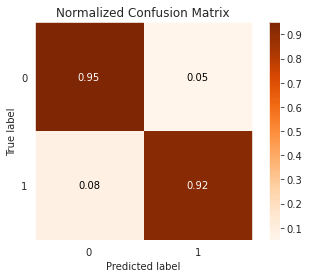

In [23]:
# Matriz confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True,cmap='Oranges')

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

###Análise dos resultados
Do Relatório de Classificação pode-se concluir que temos resultados satisfatórios para o fator que é o mais importante desse projeto, **capacidade de detectar fraudes de cartões de crédito.** O porquê disso é que devido ao balanceamento, o modelo consegue detectar acima de 90% as métricas que são interessantes na percepção  das fraudes, como por exemplo:

* *Recall* : 0.9512,
* Acurácia : 0.9512,
* Matriz Confusão para os casos de detecção de fraude *True label* x *Predicted label* : 0.92,
* Área sobre a curva ROC (AUC): 0.935.

---

**Curva ROC (*Receiver Operating Characteristic curve*)**: 

A curva ROC é uma ótima ferramenta para análise do quão habilidoso é o algoritmo de *machine learning* na hora de prever os resultados para os cenários de problemas **binários**, como esse de detecção de fraudes.

É um gráfico da taxa de falso positivo (eixo x) versus a taxa de verdadeiro positivo (eixo y) para vários valores de limiar candidatos diferentes entre 0,0 e 1,0. Dito de outra forma, ele representa a taxa de falsos alarmes em relação à taxa de acertos.

Um modelo habilidoso atribuirá uma probabilidade maior a uma ocorrência real positiva escolhida aleatoriamente do que uma ocorrência negativa em média. Isso que significa dizer que um modelo tem habilidade. Geralmente, os modelos habilidosos são representados por curvas que se curvam no canto superior esquerdo do gráfico. Resumindo:

* Um modelo **SEM** habilidade é repesentado por uma linha diagonal da parte inferior esquerda do gráfico para a parte superior direita e tem uma AUC de 0,5.

* Um modelo **COM** habilidade é representado por uma linha que viaja da parte inferior esquerda do gráfico para a parte superior esquerda e, em seguida, da parte superior para a parte superior direita.




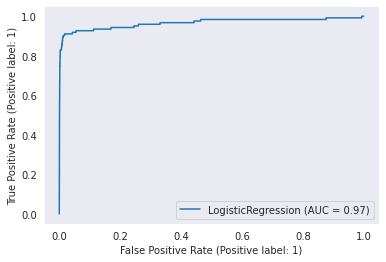

In [24]:
#ROC curve
from sklearn import metrics
metrics.plot_roc_curve(model,X_test,y_test)
plt.show()

Com o que foi explicado anteriormente é perceptivel que pela curva ROC o modelo para regressão logística pode ser definido como um modelo **habilidoso**.

##Árvore de Decisão (*Decision Tree*)

Aqui vou aplicar o algoritmo de **árvore de decisão** (Decision Tree) para prever os casos de fraudes e regulares do *dataset* tratado e também o seu desempenho.

Considerando o modelo `DecisionTreeClassifier` (a partir do `sklearn.tree`), vou trabalhar em cima do mesmo passo a passo que foi utilizado na regressão logística.

In [25]:
# 1. Escolher e importar um modelo 
from sklearn.tree import DecisionTreeClassifier 

np.random.seed(2)
# 2. Instanciar e escolher os modelos
modelo = DecisionTreeClassifier(max_depth=8, criterion = "entropy")

# 3. fit do modelo (treinar)
modelo.fit(X_rus, y_rus)

# 4. Previsão em cima dos novos casos
y_predi = modelo.predict(X_test)
y_proba = modelo.predict_proba(X_test)



### Avaliação do desempenho

Para avaliar o desempenho do modelo quando é utilizado o método `DecisionTreeClassifier` é utilizado os mesmos procedimentos que foram usados para regressão logistica, como por exemplo o método `classification_report()` que já fornece algumas métricas que são desejadas para avaliar o modelo, como por exemplo as métricas já mencionados, que nem matriz confusão, curva ROC e AUC.

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.89      0.94     71079
           1       0.01      0.89      0.03       123

    accuracy                           0.89     71202
   macro avg       0.51      0.89      0.49     71202
weighted avg       1.00      0.89      0.94     71202

Acurácia: 0.8949

AUC: 0.8946



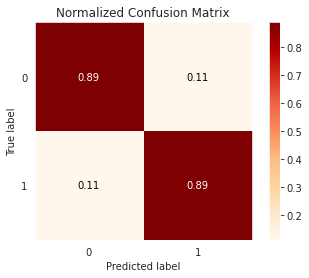

In [26]:
# classification_report
print("Classification Report: \n",classification_report(y_test,y_predi))
 
# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_predi)))
 
# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_predi)))
 
# Matriz confusão
skplt.metrics.plot_confusion_matrix(y_test, y_predi, normalize=True, cmap = 'OrRd')

### Análise dos Resultados
* *Recall* : 0.89,
* Acurácia : 0.8949,
* Matriz Confusão para os casos de detecção de fraude *True label* x *Predicted label* : 0.89,
* Área sobre a curva ROC (AUC): 0.8946.

---
**Curva ROC**:

Para esse modelo a curva ROC também apresenta um resultado expressivo, por mais que tenha uma leve inclinação da reta, pode-se dizer que é um modelo habilidoso de acordo com o gráfico abaixo.

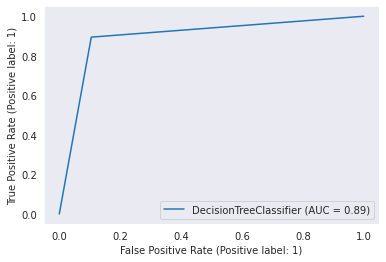

In [28]:
# curva ROC para arvore de decisão
from sklearn import metrics
metrics.plot_roc_curve(modelo,X_test,y_test)
plt.show()

### Curiosidades:
Para quem tiver interesse na visualização de como foi feito as decisões do modelo da árvore de decisão, deixei o gráfico abaixo, ilustrando como que é o processo de decisão desse tipo de modelo.

Populating the interactive namespace from numpy and matplotlib


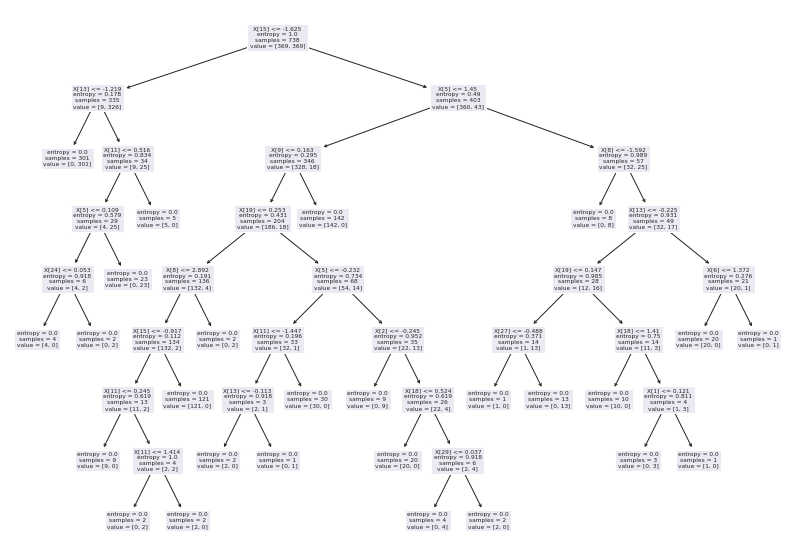

In [29]:
from sklearn import tree
%pylab inline

pylab.figure(figsize=(14,10))
tree.plot_tree(modelo.fit(X_rus, y_rus))
plt.show()

## Conclusão

Como é perceptível desde o começo do projeto esse não é o trabalho simples e que é necessário entender os diversos cenários que podem acontecer para cada resposta do algoritmo, como por exemplo as situações desagradáveis de cartão bloqueado ou fraudes.

Por isso que desde o começo,  já na parte da análise exploratória dos dados foi exigido um esforço considerável para o entendimento do que estava acontecendo com o *dataset* e suas as variávies $Vn$, *Time*, *Amout* até o balanceamento do *dataset* e este por sua vez foi feito através o método  **Random Under-sampling** que balanceou o conjunto de dados de treino para os modelos de *ML*, que com isso tornou - se possível verificar as correlações entre as variáveis e ajudando assim no trabalho de aprendizado do algoritmo de *machine learning*.

E em relação ao trabalho dos modelos de *machine learning* foi possível observar que houve bons resultados e até satisfatórios para os casos de detecção de fraudes tanto para o método de regressão logística quanto para a árvore de decisão. Entretanto como foi dito anteriormente, ainda há chances para os cenários de falso positivo que podem gerar um bloqueio no cartão do cliente e de falso negativo que permitem as ocorrências de fraude, pois possuem um pequeno percentual e precisam ser tratados, isso pode ser feito mexendo em alguns parâmetros e será  feito num trabalho futuro voltado mais para otimização do aprendizado de máquina.

Para entrar em contato comigo e para saber mais sobre como resolver isso, aqui está o meu perfil do LinkedIn: [Heitor - LinkedIn](https://www.linkedin.com/in/heitor-campos-02770734/).
